## Perceptron Model

In [22]:
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

# Loading dataset

In [23]:
data = pd.read_csv(r"C:\Users\Divye Maggo\Downloads\diabetes.csv")
data

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

# Spliitng the features and target value 

In [24]:
X = data.iloc[0: , :-1]
Y = data.iloc[:,-1]
import matplotlib.pyplot as plt
#Performing standard scaling
X=StandardScaler().fit_transform(X)
X= pd.DataFrame(X)



# Train test split

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state=1)

# Building Perceptron from scratch

In [26]:
X_train = X_train.values
X_test = X_test.values

## Perceptron using class

In [27]:
class Perceptron_From_Scratch:
  
    #initialising weight and bias
    def __init__ (self):
        self.weight = None
        self.bias = None
    
    #code to predict_outcome
    def model(self, x):
        return 1 if (np.dot(self.weight, x) >= self.bias) else 0
    
    #to pass data row by row
    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)
    
    #main implementation of class
    def fitting_model(self, X, Y, epochs = 1, lr = 1):
        
        #initialsing the weights with '1'
        self.weight = np.ones(X.shape[1])

        #initialsing bias with 0
        self.bias = 0


        for i in range(epochs):
            for x, y in zip(X, Y):
                y_pred = self.model(x)
                #implementing 0-1 loss function
                if y == 1 and y_pred == 0:
                    self.weight = self.weight + lr * x
                    self.bias = self.bias - lr * 1
                elif y == 0 and y_pred == 1:
                    self.weight = self.weight - lr * x
                    self.bias = self.bias + lr * 1


In [33]:
perceptron = Perceptron_From_Scratch()
perceptron.fitting_model(X_train, Y_train, 8, 0.007)
Y_pred_test = perceptron.predict(X_test)
accuracy_score(Y_pred_test, Y_test)

0.6428571428571429

(0.7272727272727273, 0.001)
(0.7532467532467533, 0.002)
(0.7727272727272727, 0.003)
(0.5714285714285714, 0.004)
(0.5714285714285714, 0.005)
(0.6038961038961039, 0.006)
(0.6428571428571429, 0.007)
(0.5974025974025974, 0.008)


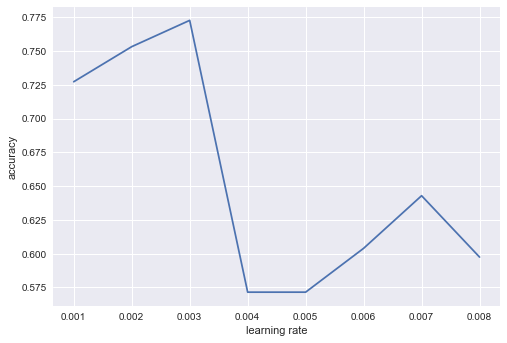

In [29]:
LearningRate_vs_Accuracy=[] #CONSTANT Epoch
for i in np.arange(0.001,0.009,0.001):
    perceptron.fitting_model(X_train, Y_train, 8, i)
    Y_pred_test = perceptron.predict(X_test)
    LearningRate_vs_Accuracy.append((accuracy_score(Y_pred_test, Y_test),i))
for i in LearningRate_vs_Accuracy:
    print(i)
acc=[]
lr=[]
for i in LearningRate_vs_Accuracy:
    acc.append(i[0])
    lr.append(i[1]) 
plt.plot(lr,acc)
plt.xlabel("learning rate")
plt.ylabel("accuracy")
plt.show()

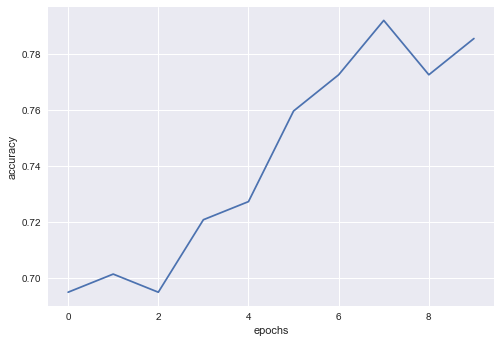

In [30]:
Epoch_vs_Accuracy=[] #constant learningrate
for i in range(0,10,1):
    perceptron.fitting_model(X_train, Y_train, i, 0.003)
    Y_pred_test = perceptron.predict(X_test)
    Epoch_vs_Accuracy.append((accuracy_score(Y_pred_test, Y_test),i))


acc=[]
epochs=[]
for i in Epoch_vs_Accuracy:
    acc.append(i[0])
    epochs.append(i[1]) 
plt.plot(epochs,acc)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()


In [31]:
perceptron.fitting_model(X_train, Y_train, 7, 0.003)
Y_pred_test = perceptron.predict(X_test)
accuracy_score(Y_pred_test, Y_test)

0.7922077922077922